# Ionization fraction:

In [42]:
filename = "output_00106/cooling_00106.out"
c, nH, T2 = rd_cool(filename)
xion = data.gas['xion']
nHgal = (data.gas['rho'].in_units('g cm**-3')/co.m_p.cgs)
T2gal = data.gas['temp'] 

Text(0.5, 0, 'log$_{10}(\\chi)$')

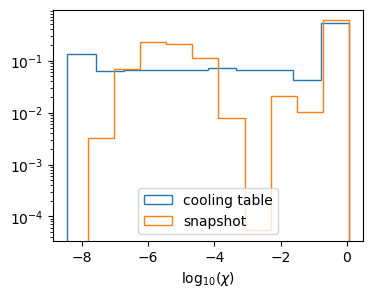

In [43]:
fig, ax = plt.subplots(figsize=(4,3))
plt.hist((np.concatenate(c.xion)), histtype='step', 
         label='cooling table', density=True);
plt.hist(np.log10(xion), histtype='step', 
         label='snapshot', density=True);
plt.yscale('log')
plt.legend(loc='lower center')
plt.xlabel('log$_{10}(\chi)$')

Text(0.5, 0, 'log$_{10}(n_H)$')

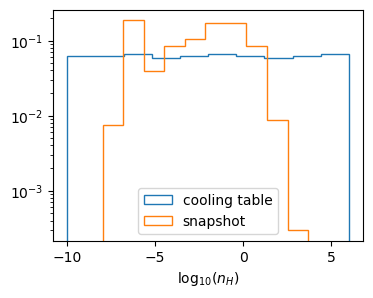

In [44]:
fig, ax = plt.subplots(figsize=(4,3))
plt.hist(nH, histtype='step', label='cooling table', density=True);
plt.hist(np.log10(np.array(nHgal)), histtype='step', 
         label='snapshot', density=True);
plt.yscale('log')
plt.legend(loc='lower center')
plt.xlabel('log$_{10}(n_H)$')

Text(0.5, 0, 'log$_{10}(T)$')

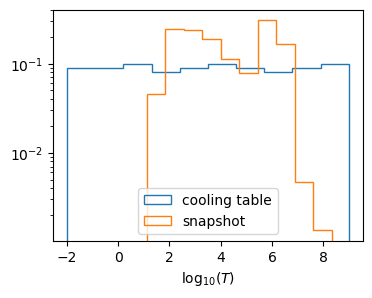

In [45]:
fig, ax = plt.subplots(figsize=(4,3))
plt.hist(T2, histtype='step', label='cooling table', density=True);
plt.hist(np.log10(np.array(T2gal)), histtype='step', 
         label='snapshot', density=True);
plt.yscale('log')
plt.legend(loc='lower center')
plt.xlabel('log$_{10}(T)$')

Text(0, 0.5, 'log$_{10}(T)$')

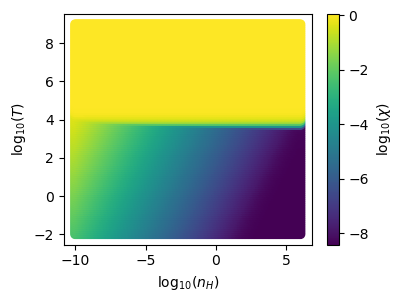

In [46]:
plt.figure(figsize=(4,3))
lognHvals, logT2vals = np.meshgrid(nH, T2)
plt.scatter(lognHvals, logT2vals, c=c.xion)
plt.colorbar(label='log$_{10}(\chi)$')
plt.xlabel('log$_{10}(n_H)$')
plt.ylabel('log$_{10}(T)$')

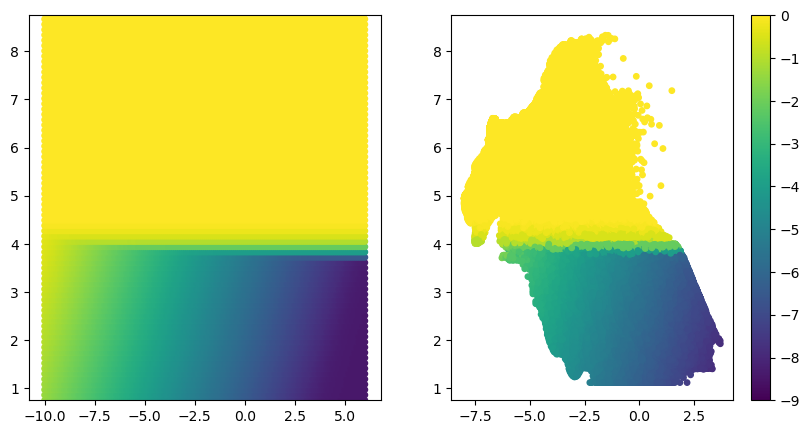

In [81]:
nHgal = np.array(nHgal)
T2gal = np.array(T2gal)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(lognHvals, logT2vals, c=np.concatenate(c.xion), 
            s=15, vmin=-9, vmax=0)
ax[0].set_ylim(0.75,8.75)
plt.scatter(np.log10(nHgal), np.log10(T2gal), c=np.log10(xion), 
            s=15, vmin=-9, vmax=0)
ax[1].set_ylim(0.75,8.75)
plt.colorbar()

Text(0, 0.5, 'log$_{10}(\\chi)$')

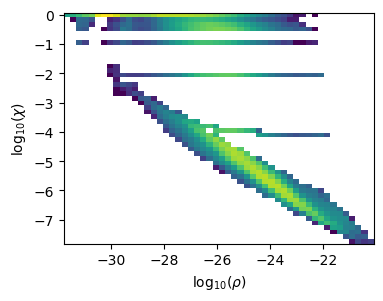

In [82]:
plt.figure(figsize=(4,3))
plt.hist2d(np.log10(data.gas['rho'].in_units('g cm**-3')), np.log10(xion), 
           bins=50, norm=LogNorm());
plt.xlabel('log$_{10}(\\rho)$')
plt.ylabel('log$_{10}(\chi)$')


### Could change to pandas DF so I can sort by density:

In [ ]:
properties = list(data.gas)
props = ['beta', 'c_s', 'kpar', 'kratio', 'M_A0', 'M_s', 'mass', 'rho', 'scalar_01', 'sigma1d', 'smooth', 'temp', 'xion', 'x', 'y', 'z']
df = pd.DataFrame(columns=np.sort(props))
for prop in props:
    df[prop] = data.gas[prop]
    if prop == 'rho':
        df[prop] = data.gas[prop].in_units('g cm**-3')
df = df.sort_values('rho')